### Введение

Широко известно, что для машинного обучения используется Python. Но также известно, что Python уступает по своему быстродействию *компилируемым* языкам типа C++, C# или Kotlin. Поэтому не всегда понятно, почему для задач ML, где используются тяжеловесные модели, которые должны отвечать быстро, используется интерпретируемый Python.

На этот вопрос есть два ответа:
* удобный синтаксис для операций над векторами
* скорость векторизованных операций

In [1]:
import numpy as np

Библиотека NumPy, которую мы разберём на этом семинаре, позволяет многократно оптимизировать работу с векторами по памяти и по времени. Если не вдаваться глубоко в подробности работы векторов NumPy, то они
* Работают быстро благодаря тому, что все внутренние операции написаны на C++
* Занимают меньше памяти благодаря типизации - к примеру, по умолчанию векторы заполняются целыми либо вещественными числами. Также как и обычные списки, векторы NumPy могут содержать данные разных типов, но по умолчанию в них выделяется память под элементы одного (заранее выбранного) типа.

### Инициализация numpy-массивов

Ниже приведены примеры инициализации списков с разными интервалами чисел

In [ ]:
[i for i in range(10)] # Инициализация массива интервалом чисел от 0 до 9

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
np.arange(10) # То же самое, но в стиле NumPy

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
[i for i in range(5, 10, 2)] # Инициализация массива интервалом чисел от 5 до 9 с шагом 2

[5, 7, 9]

In [ ]:
np.arange(5, 10, 2) # Аналогично при помощи NumPy

array([5, 7, 9])

Классический `range` не позволяет работать с нецелым шагом, потому что его задача - возвращать целочисленный счетчик. А будет ли это работать в `arange`?

In [ ]:
[i / 100 for i in range(-1000, 1000)][:10]

[-10.0, -9.99, -9.98, -9.97, -9.96, -9.95, -9.94, -9.93, -9.92, -9.91]

В ячейке ниже напишите код, задающий аналогичный массив при помощи NumPy

In [ ]:
# [i for i in range(?, ?, 0.01)] -> TypeError: 'float' object cannot be interpreted as an integer
def floating_step_range():
    return # Ваш код

Запустите тесты, чтобы убедиться, что вы всё сделали правильно

In [ ]:
actual = floating_step_range()
expected = [i / 100 for i in range(-1000, 1000)]

assert len(actual) == 2000
np.testing.assert_array_almost_equal(actual[:10], expected[:10])
np.testing.assert_array_almost_equal(actual[40:50], expected[40:50])
np.testing.assert_almost_equal(actual[1488], 4.88)

print('good job!')

Помимо arange есть более простые функции для инициализации массивов - это `zeros` и `ones`. Они принимают на вход только размерность массива, который мы хотим создать

In [ ]:
[0] * 4

[0, 0, 0, 0]

In [ ]:
np.zeros(4)

array([0., 0., 0., 0.])

In [ ]:
[1] * 8

[1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
np.ones(8)

array([1., 1., 1., 1., 1., 1., 1., 1.])

Также есть отдельная функция для получения единичной матрицы

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Немного магии типов

In [ ]:
[[1 for j in range(2)] for i in range(2)]

[[1, 1], [1, 1]]

In [ ]:
a = np.ones((2, 2))

print(f'np.ones:\n{a}\n')
print(f'np.array.astype:\n{a.astype(int)}\n')

np.ones:
[[1. 1.]
 [1. 1.]]

np.array.astype:
[[1 1]
 [1 1]]



Напишите функцию, возвращающую эквивалентный результат, при помощи библиотеки NumPy

In [ ]:
[[['1' for k in range(3)] for j in range(2)] for i in range(1)]

[[['1', '1', '1'], ['1', '1', '1']]]

In [ ]:
def make_3x2x1_string_matrix():
    return # Ваш код

In [ ]:
actual = make_3x2x1_string_matrix()
expected = [[['1' for k in range(3)] for j in range(2)] for i in range(1)]

assert actual.shape[0] == len(expected[0][0])
assert actual.shape[1] == len(expected[0])
assert actual.shape[2] == len(expected)
assert (actual == '1').all()
assert actual.dtype == np.dtype('<U21')

Вместо того, чтобы вызывать `len(a), len(a[0]), ...`, можно просто вызвать свойство `shape`, которое показывает размеры по всем размерностям массива

In [ ]:
images = np.zeros((32, 3, 512, 512))
images.shape

(32, 3, 512, 512)

Мы можем получить обычный питоновский список из NumPy-массива, вызвав у последнего метод `tolist`

In [ ]:
np.zeros((3, 3)).astype(int).tolist()

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

Для многомерных массивов стандартная функция `list` работает не совсем так, как ожидается

In [ ]:
print(list(np.zeros(5).astype(int)))
print(list(np.zeros((3, 3)).astype(int)))

[0, 0, 0, 0, 0]
[array([0, 0, 0]), array([0, 0, 0]), array([0, 0, 0])]


### Векторизованные операции

Инициализируем два numpy-массива

In [ ]:
a = np.arange(1, 6)
b = a[::-1]

# Обратное индексирование: пройдём весь массив a[:] с индексацией -1
# a[-1] == a[len(a) - 1];
# a[-2] == a[len(a) - 2];
# ...
# a[-len(a)] = a[len(a) - len(a)];

print(a)
print(b)

[1 2 3 4 5]
[5 4 3 2 1]


Теперь все арифметические операции доступны в *векторизованном* варианте - не нужно вызывать, например, умножение для каждого элемента попарно, чтобы получить массив произведений

Также важно, что такие операции выполняются быстрее обычного итерирования по массиву

In [ ]:
print(a + b)
print(a * b)
print(a / b)
print(a - 10)
print(a * 0.5)
print(a / 0.123)
print()

[6 6 6 6 6]
[5 8 9 8 5]
[0.2 0.5 1.  2.  5. ]
[-9 -8 -7 -6 -5]
[0.5 1.  1.5 2.  2.5]
[ 8.1300813 16.2601626 24.3902439 32.5203252 40.6504065]



**Важно:** векторизованные операции требуют определённого согласования размеров векторов. Например, код `a + b` не сработает для *плоских* векторов (у свойства shape есть доступен только индекс 0), если их длины не равны.

In [ ]:
np.ones(3) * np.ones(5)

ValueError: ignored

Такая штука называется "броадкастинг" (broadcasting - вещание или распространение), подробнее можно почитать в официальной документации Numpy: https://numpy.org/doc/stable/user/basics.broadcasting.html

Если говорить коротко, то для всех измерений наших векторов, соответствующих друг другу, должно выполняться хотя бы одно из условий:
* Оба измерения равны
* Одно из измерений равно 1

Пример:
* Векторы $(1, 10, 9)$ и $(3, 10, 1)$ совместимы с точки зрения векторизованных операций
* Векторы $(1, 2, 3)$ и $(3, 2, 1)$ совместимы с точки зрения векторизованных операций
* Векторы $(4, 1, 9)$ и $(2, 2, 8)$ **несовместимы** с точки зрения векторных операций

In [ ]:
np.ones((3, 1)) + np.ones((1, 5))

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

Давайте перепишем указанную ниже функцию на numpy

In [ ]:
def inverse_ones(n):
    return [[1 if i != j else 0 for i in range(n)] for j in range(n)]


np.array(inverse_ones(4))

array([[0, 1, 1, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 0]])

In [2]:
def np_inverse_ones(n):
  return (1 - np.eye(n)).astype(int)# Ваш код
np.array(np_inverse_ones(4))

array([[0, 1, 1, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 0]])

Аггрегация - сумма, минимум/максимум, среднее, медиана

In [ ]:
print(np.sum(a), a.sum())
print(np.mean(a), a.mean())
print(np.min(a), a.min())
print(np.max(a), a.max())
print()

# У np-массива нет функции медианы, но зато такая функция есть в модуле numpy
print(np.median(a))

15 15
3.0 3.0
1 1
5 5

3.0


Давайте наконец посмотрим, насколько же быстро работают векторизованные операции

In [ ]:
a = np.arange(10000)

In [ ]:
def rand_mul(a):
    res = [0] * len(a)  # сэкономим время, заранее выделив память
    rnd = np.random.random(len(a))
    for i in range(len(a)):
        res[i] = a[i] * rnd[i]
    return res

In [ ]:
%timeit rand_mul(a)

10 loops, best of 5: 27.2 ms per loop


In [ ]:
%timeit a * np.random.random(10000)

10000 loops, best of 5: 99.3 µs per loop


В **250** раз меньше времени на 1 операцию!

NumPy предоставляет всевозможные функции типа $\exp{x}, \sin{x}, \cos{x}, \log{x}$ и позволяет их комбинировать с векторизованными операциями умножения, сложения, возведения в степень и т.д.

In [ ]:
a = np.linspace(0.1, 10, 991) # зададим линейное пространство на выбранном интервале
# многомерные линейные пространства инициализируются функцией mgrid

list(a[:5])

[0.1, 0.11, 0.12000000000000001, 0.13, 0.14]

In [ ]:
import matplotlib.pyplot as plt

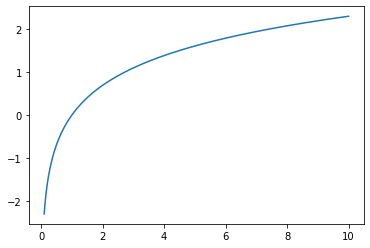

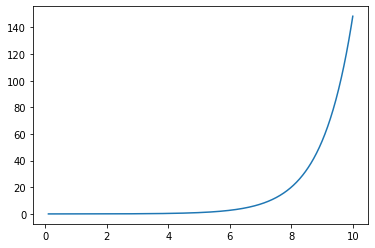

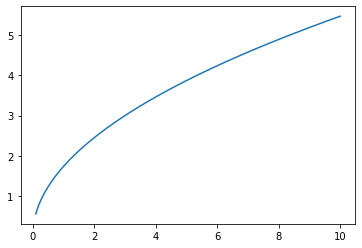

In [ ]:
plt.plot(a, np.log(a))
plt.show()

plt.plot(a, np.exp(a - 5))
plt.show()

plt.plot(a, np.sqrt(a * 3))
plt.show()

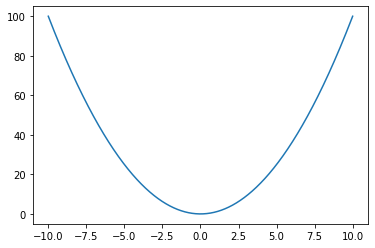

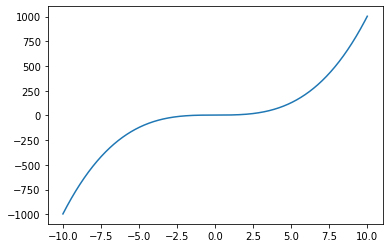

In [ ]:
a = np.linspace(-10, 10, 1000)
plt.plot(a, a ** 2)
plt.show()

plt.plot(a, 4 + a ** 3)
plt.show()

NumPy позволяет применять какие-либо функции к массивам вдоль заданной оси или вдоль какой-то заданной последовательности осей. Это полезно, например, когда нам нужно посчитать $k$ независимых максимумов в массиве $(N,k)$.

In [ ]:
a = np.array([
    [1, 2, 3, 4],
    [1, 2, 3, 4]
])

In [ ]:
def f(x):
    return np.exp(x).T / np.sum(np.exp(x))

In [ ]:
print(a)
print(np.apply_along_axis(f, axis=0, arr=a))
print(np.apply_along_axis(f, axis=1, arr=a))

[[1 2 3 4]
 [1 2 3 4]]
[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]
[[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.0320586  0.08714432 0.23688282 0.64391426]]


Некоторые встроенные функции умеют принимать в качестве параметра ось, вдоль которой они должны отработать. Если это аггрегирующие функции, то по умолчанию они аггрегируют весь массив, но таким способом можно заставить их отобразить максимум, минимум или сумму вдоль заданной оси.

In [ ]:
a

array([[1, 2, 3, 4],
       [1, 2, 3, 4]])

Отобразим минимум сначала вдоль индексации $i$, потом вдоль индексации $j$, затем общий минимум во всём массиве

In [ ]:
a.min(axis=0), a.min(axis=1), a.min()

(array([1, 2, 3, 4]), array([1, 1]), 1)

In [ ]:
a.max(axis=0), a.max(axis=1), a.max()

(array([1, 2, 3, 4]), array([4, 4]), 4)

In [ ]:
a.sum(axis=0), a.sum(axis=1), a.sum()

(array([2, 4, 6, 8]), array([10, 10]), 20)

In [ ]:
a.mean(axis=0), a.mean(axis=1), a.mean()

(array([1., 2., 3., 4.]), array([2.5, 2.5]), 2.5)

### Индексация. Маски. Функции по индексам

Всё, что было разобрано выше, несомненно, очень интересно. Но самые невероятные вещи NumPy позволяет делать с индексами массивов.

In [4]:
a = np.array([[1, 2, 3], [4, 5, 6]])

Для начала разберём несколько простых примеров на индексацию.

In [ ]:
a[0, 0] # вместо a[0][0]

1

In [ ]:
a[:, ::-1]

array([[3, 2, 1],
       [6, 5, 4]])

In [ ]:
a[:, ::2]

array([[1, 3],
       [4, 6]])

В NumPy есть вещи, которые сильно упрощают работу с последовательностями - в частности, упрощают работу с проверкой условий. Логические операции, будучи применёнными к np.array, возвращают **маску** - другой массив, содержащий значения типа `bool`, которые показывают истинность или ложность проверяемого выражения для **каждого** элемента.

In [5]:
a % 2 == 0 # Что вернёт a % 2?

array([[False,  True, False],
       [ True, False,  True]])

In [6]:
a > 3

array([[False, False, False],
       [ True,  True,  True]])

In [7]:
# Отобразите индексы всех чисел в a, отличающиеся от тройки не более чем на единицу
# Ваш код
np.abs(a - 3) <= 1

array([[False,  True,  True],
       [ True, False, False]])

И главное преимущество NumPy в том, что эти маски могут быть использованы для итерации по исходному массиву:

In [ ]:
a[a % 2 == 0]

array([2, 4, 6])

In [ ]:
a[a > 3]

array([4, 5, 6])

In [ ]:
# Отобразите все элементы массива a, отличающиеся от тройки не более чем на единицу
# Ваш код

Условия масок можно комбинировать через `&` и `|`, в этом случае каждое условие ограничивается скобками

In [ ]:
(a >= 2) & (a <= 4)

array([[False,  True,  True],
       [ True, False, False]])

In [ ]:
a[(a % 2 == 0) & (a > 3)]

array([4, 6])

In [ ]:
a[(a % 2 == 1) | (a <= 3)]

array([1, 2, 3, 5])

Давайте реализуем функцию, которая выведет все значения аргументов функции $f(x)= \sin{x}$ на заданном интервале $[a,b]$, при которых $-\frac{1}{2} < f(x) < \frac{1}{2}, a \leq x \leq b$

In [11]:
def args_of_sin_in_range(a, b, num_points=1000):
    x = np.linspace(a,b, num_points)# a, b, num_points
    y = np.sin(x)# f(x)
    return x[((y > -0.5) & (y < 0.5))]# x: -1/2 < f(x) < 1/2

In [9]:
from math import sin, pi

def vanilla_args(a, b, num_points=1000):
    step = (b - a) / (num_points - 1)
    x = a
    res = []
    while x <= b:
        if -0.5 < sin(x) < 0.5:
            res.append(x)
        x += step
    return res

In [12]:
np.testing.assert_almost_equal(args_of_sin_in_range(-np.pi, np.pi), vanilla_args(-pi, pi))
np.testing.assert_almost_equal(args_of_sin_in_range(-100, -50), vanilla_args(-100, -50))
np.testing.assert_almost_equal(args_of_sin_in_range(3, 4), vanilla_args(3, 4))

Также NumPy предоставляет специальные функции, которые возвращают индексы по значениям самого массива - например, по наибольшему или наименьшему.

In [ ]:
a.argmin(), a.argmax()

(0, 5)

Как видно из примера выше, функции `argmin` и `argmax` работают с *плоскими* массивами - то есть, приводят массив $(2, 3)$ к плоскому виду, а затем вычисляют индекс, которому соответствует минимальное/максимальное значение. Функция `argsort` работает аналогично.

In [ ]:
a.argsort(axis=None)

array([0, 1, 2, 3, 4, 5])

In [ ]:
b = a.reshape(-1)

np.random.shuffle(b)
print(b)
print()

sorted_mask = b.argsort()
print(sorted_mask)
print(b[sorted_mask])

[1 4 3 5 6 2]

[0 5 2 1 3 4]
[1 2 3 4 5 6]


### Изменение формы массивов. Соединение массивов. Транспонирование.

Здесь мы попытаемся ответить на главный вопрос - как менять форму векторов и как их соединять.

За изменение формы векторов отвечает функция reshape. Обратите внимание, что результатом действия функции reshape может быть только вектор, произведение всех измерений которого совпадает с исходным. Понятно, что из вектора `[3, 3, 3]` не получишь картинку `[64, 64]`. Однако, можно получить вектор `[27]`

In [ ]:
a = np.zeros((5, 5))

In [ ]:
a.reshape(25)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
a.reshape((1, 1, 5, 5))

array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]])

Также есть интересная особенность функции `reshape` - она позволяет принимать на вход `-1` в качестве одного из измерений - зная все остальные измерения, библиотека легко посчитает значение для этой "переменной" размерности, основываясь на известных компонентах и их числе.

In [ ]:
a.reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
a.reshape(-1).shape == a.reshape(25).shape

True

Инициализируйте вектор размерностью `(1, 32, 64, 64)`, а затем придайте ему следующие размерности:
* `(32, 64, 64)`
* `(1, 32 x 64 x 64)`
* `(32, 64 x 64)`
* `(4, 8, 8, 16, 32)`

In [13]:
v = np.ones((1,32,64,64))
v1 = v.reshape((32,64,64))
v2 = v.reshape((1,32*64*64))
v3 = v.reshape((32,64*64))
v4 = v.reshape((4,8,8,16,32))

Два вектора также можно соединить вдоль какого-то из измерений. 

In [ ]:
a = np.zeros(5)
b = np.zeros(5)

np.vstack((a, b)).shape # из двух одноэтажных поездов получили двухэтажный

(2, 5)

In [ ]:
np.hstack((a, b)).shape # сцепили вагоны из двух составов

(10,)

Более общие функции stack и concatenate позволяют соединять вектора по произвольной размерности.

In [ ]:
a = np.zeros((1, 32, 64, 64))
b = np.zeros((1, 32, 64, 128))

np.concatenate((a, b), axis=-1).shape # соединяет вектора разных размерностей

(1, 32, 64, 192)

In [ ]:
a = np.zeros((1, 32, 32))
b = np.zeros((1, 32, 32))

np.stack([a, b], axis=2).shape # появилась новая (!) ось, по которой векторы были соединены

(1, 32, 2, 32)

### * Матричные операции. Скалярное произведение, транспонирование.

#### Теория

Здесь я должен немного познакомить искушённого читателя с основными понятиями линейной алгебры. Из школьного курса вы наверняка знакомы с векторами - и привыкли, что они задают какое-то направление для точки на плоскости.

Матрицы (a.k.a. *двумерные* векторы) действуют по схожему принципу - они выполняют преобразование какого-то объекта в линейном пространстве сразу по нескольким *базисным* векторам. Базисный вектор - это единичный вектор, который нельзя выразить линейной комбинацией других базисных векторов - проще говоря, это вектор, соответствующий какой-то из осей пространства.

Тензоры - это удобное обобщение векторов и матриц. Если векторы записываются в виде строк, а матрицы в виде табличек ("стопок" строк), то тензоры просто обобщают эту идею на большие размерности. Тензор третьего ранга, например, описывается в виде куба, четвертого - как "набор" трёхмерных кубов и так далее.

Здесь и далее для простоты я буду использовать термин "вектор", чтобы не пугать читателя тензорами, хотя формально, конечно, это неправильно.

#### Операции над матрицами и векторами

Если со сложением векторов проблем не возникает, то умножение уже вызывает вопросы. На самом деле в алгебре различают умножения двух видов - поэлементное (произведение Адамара) и скалярное. Также существует векторное произведение, но в рамках этого курса нас оно не будет интересовать.

Скалярное произведение двух плоских векторов работает следующим образом: нам необходимо взять поэлементное произведение векторов, а затем сложить все компоненты векторов:

$$a \cdot b = \sum_{i=1}^N a_i \times b_i = c$$

In [ ]:
a = np.random.randint(0, 10, size=3)
b = np.random.randint(0, 10, size=3)

(a * b).sum()

79

Здорово, когда векторы одной размерности! Но что делать, когда размерности не совпадают? Помните, ранее мы смотрели, как выполнять сложение и умножение для векторов-столбцов и векторов-строк? Так вот, здесь работает аналогичная идея, просто запишем один вектор в виде столбца, а другой - в виде строки. Тогда если длина первого вектора равна $n$, а другого $m$, то на выходе мы получим матрицу размером $n \times m$.

Эта идея хорошо обобщается на матрицы, да и вообще на вектор любой размерности (подразумевается, конечно же, тензор любого ранга). Единственное требование - два измерения у этих векторов должны совпадать. Тогда мы "стыкуем" векторы этими совпадающими измерениями друг к другу и перемножаем, на выходе получаем только те измерения, которые не соприкасались.

Так, если это векторы-строки или векторы-столбцы, то они приводятся к размерности $(1,n)$ или $(n,1)$ и тут уже **важно** то, что мы хотим получить. Если мы хотим получить **число**, то нам необходимо, чтобы длины векторов совпадали:
$$(1,n) \times (n,1) \rightarrow (1,1)$$

Если мы хотим получить матрицу, то нам неважно, какие у них длины, мы в любом случае получим корректную матрицу:
$$(n,1) \times (1,m) \rightarrow (n,m)$$

В случае матриц нам важно, чтобы внутренние размерности совпадали. Так, перемножая скалярно матрицы $(n,p)$ и $(p,m)$, мы получим матрицу $(n,m)$.

Можно ли перемножить и если да, то какие выходные размерности получатся при скалярном перемножении у следующих векторов:

1. $(1,3)$ и $(3,1)$?
2. $(1,4)$ и $(3,1)$?
3. $(1,4)$ и $(4,4)$?
4. $(4,4)$ и $(1,4)$?
5. $(3,4)$ и $(3,3)$?
6. $(11,14)$ и $(14,12)$?
7. $(32,3,16)$ и $(16,4)$?

##### Ответы:

1. Да, $(1,1)$
2. Нет
3. Да, $(1,4)$
4. Нет
5. Нет
6. Да, $(11,12)$
7. Да, $(32,3,4)$

#### Транспонирование

Иногда при перемножении матриц мы получаем не совсем те размерности, которые мы хотели бы получить. В этом случае интуиция нам подсказывает, что можно как-то развернуть векторы так, чтобы они "стакнулись" совпадающими размерностями и перемножились. Это правда так и такая операция называется *транспонированием*. Проще говоря, мы меняем местами две размерности вектора и физически *поворачиваем* его так, что это позволяет нам перемножить его с другим вектором.

In [ ]:
v = np.random.randint(0, 10, size=4)
v.transpose(), v.transpose().shape

(array([9, 0, 3, 3]), (4,))

Для плоского вектора ничего не поменялось - давайте сделаем его двумерным!

In [ ]:
v = np.random.randint(0, 10, size=(1, 4))
v.transpose(), v.transpose().shape

(array([[0],
        [1],
        [7],
        [4]]), (4, 1))

In [ ]:
v = np.random.randint(0, 10, size=(3, 5))
v.transpose(), v.transpose().shape

(array([[4, 1, 9],
        [5, 9, 6],
        [7, 9, 2],
        [8, 3, 5],
        [2, 0, 2]]), (5, 3))

Для векторов большей размерности нужно явно указывать новый порядок осей, используя индексы существующих

In [ ]:
v = np.random.randint(0, 10, size=(1, 3, 5))
v.transpose(2, 0, 1), v.transpose(2, 0, 1).shape

(array([[[9, 8, 5]],
 
        [[9, 6, 6]],
 
        [[6, 8, 2]],
 
        [[6, 9, 7]],
 
        [[5, 0, 8]]]), (5, 1, 3))

Ну и, очевидно, в NumPy существует замечательная функция, позволяющая перемножить векторы произвольных размерностей!

In [ ]:
np.matmul(a, b) # Прокрутите выше - там точно такой же результат :)

79

In [ ]:
a = np.random.randint(0, 10, size=(4, 5))
b = np.random.randint(0, 10, size=(5, 3))

np.matmul(a, b), np.matmul(a, b).shape

(array([[200, 114, 176],
        [170,  48, 197],
        [144,  93, 153],
        [ 94,  66, 102]]), (4, 3))

In [ ]:
X = np.random.randint(0, 10, size=(64, 3, 100))
W = np.random.randint(0, 10, size=(100, 4))

np.matmul(X, W).shape

(64, 3, 4)